In [4]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import collections
import matplotlib.pyplot as plt

df = pd.read_csv("/work/group/oit_research_data/mobility/data/data_DFW_2021/data/DFW_2021_03/G14_DFW_output.tsv", sep='\t')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat))


"""
Goal: Get a list of people living in food deserts based on home data

1) Find people found "living" in spatial cell for 6+ months
2) Exclude people not living in food deserts (Clip by food desert areas)
3) Export final list of remaining Device IDs

"""

'\n# Plot the data\nfig, ax = plt.subplots(figsize=(10, 10))\ngdf.plot(ax=ax, markersize=5, color=\'blue\', alpha=0.5)\nplt.title("Geospatial Plot of Latitude and Longitude Data")\nplt.xlabel("Longitude")\nplt.ylabel("Latitude")\nplt.show()\n'

In [5]:
#Creating list of dataframes with monthly data in selected cell
def row_map(row_letter, row_num, starting_month, ending_month):
    listOfdataframes = []
    for i in range(starting_month,ending_month+1):
        df = pd.read_csv("/work/group/oit_research_data/mobility/data/data_DFW_2021/data/DFW_2021_"+"{:02d}".format(i)+"/" + row_letter + str(row_num)+ "_DFW_output.tsv", sep='\t')
        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
        listOfdataframes.append(gdf)
    return listOfdataframes

In [6]:
#Pulling data manually
H13months = row_map("H", 13, 1, 12)
H14months = row_map("H", 14, 1, 12)

G11months = row_map("G", 11, 1, 12)
G12months = row_map("G", 12, 1, 12)
G13months = row_map("G", 13, 1, 12)
G14months = row_map("G", 14, 1, 12)


F11months = row_map("F", 11, 1, 12)
F12months = row_map("F", 12, 1, 12)
F13months = row_map("F", 13, 1, 12)
F14months = row_map("F", 14, 1, 12)

E11months = row_map("E", 11, 1, 12)
E12months = row_map("E", 12, 1, 12)
E13months = row_map("E", 13, 1, 12)


In [7]:
#Determining how many months a unique device ID shows up in a spatial cell of data and keeping folks in 6+ months
def IDcounter(cellList):
    listOfIDs = []
    for item in cellList:
        listOfIDs = listOfIDs + list(item['Device_ID'])
    
    counter = collections.Counter(listOfIDs).items()
    
    finalCounter = {}
    
    peopleUnder6months= 0
    peopleOver6months = 0
    
    for item in counter:
        if item[1]>2:
            finalCounter[item[0]] = item[1]
            peopleOver6months = peopleOver6months +1
        else:
            peopleUnder6months = peopleUnder6months+1
    print(peopleOver6months)        
    print(peopleUnder6months)
    print("")
    
    return finalCounter

In [ ]:
#Dictionary of spatial cells reviewed
dictionaryOfCells = {"H":[13,14], "G":[11,12,13,14],"F":[11,12,13,14], "E":[11,12,13]}

In [8]:
#Manually creating ID counts
H13counter = IDcounter(H13months)
H14counter = IDcounter(H14months)

G11counter = IDcounter(G11months)
G12counter = IDcounter(G12months)
G13counter = IDcounter(G13months)
G14counter = IDcounter(G14months)

F11counter = IDcounter(F11months)
F12counter = IDcounter(F12months)
F13counter = IDcounter(F13months)
F14counter = IDcounter(F14months)

E11counter = IDcounter(E11months)
E12counter = IDcounter(E12months)
E13counter = IDcounter(E13months)



9762
11089

9031
7784

5392
5538

6442
8871

6407
7671

9034
9166

4178
4622

6058
7707

2937
4334

5915
5976

4998
4598

4681
5651

1556
1949



In [9]:

def dataframeFromCounter(counter):
    Mydict = {}
    
    Mydict['Device_ID'] = counter.keys()
    Mydict['Num Months in Data'] = counter.values()
    
    return pd.DataFrame.from_dict(Mydict)

#Creating dataframe with location data for selected IDs
def locationDataFrameByMonth(dataframe, row_letter, row_num, month):
    leftDf = dataframe
    rightDf = pd.read_csv("/work/group/oit_research_data/mobility/data/data_DFW_2021/data/DFW_2021_"+"{:02d}".format(month)+"/" + row_letter + str(row_num)+ "_DFW_output.tsv", sep='\t')
    mergedDf = pd.merge(leftDf, rightDf, left_on = 'Device_ID', right_on = 'Device_ID', how='inner')
    return(mergedDf)



In [10]:
#Creating geodataframes manually
H13AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(H13counter), "H", 13, 4)
H13AprilGeoDataFrame = gpd.GeoDataFrame(H13AprilDataFrame, geometry=gpd.points_from_xy(H13AprilDataFrame.Lon, H13AprilDataFrame.Lat))
H13AprilGeoDataFrame.crs = 4269 

H14AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(H14counter), "H", 14, 4)
H14AprilGeoDataFrame = gpd.GeoDataFrame(H14AprilDataFrame, geometry=gpd.points_from_xy(H14AprilDataFrame.Lon, H14AprilDataFrame.Lat))
H14AprilGeoDataFrame.crs = 4269

G11AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(G11counter), "G", 11, 4)
G11AprilGeoDataFrame = gpd.GeoDataFrame(G11AprilDataFrame, geometry=gpd.points_from_xy(G11AprilDataFrame.Lon, G11AprilDataFrame.Lat))
G11AprilGeoDataFrame.crs = 4269

G12AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(G12counter), "G", 12, 4)
G12AprilGeoDataFrame = gpd.GeoDataFrame(G12AprilDataFrame, geometry=gpd.points_from_xy(G12AprilDataFrame.Lon, G12AprilDataFrame.Lat))
G12AprilGeoDataFrame.crs = 4269

G13AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(G13counter), "G", 13, 4)
G13AprilGeoDataFrame = gpd.GeoDataFrame(G13AprilDataFrame, geometry=gpd.points_from_xy(G13AprilDataFrame.Lon, G13AprilDataFrame.Lat))
G13AprilGeoDataFrame.crs = 4269

G14AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(G14counter), "G", 14, 4)
G14AprilGeoDataFrame = gpd.GeoDataFrame(G14AprilDataFrame, geometry=gpd.points_from_xy(G14AprilDataFrame.Lon, G14AprilDataFrame.Lat))
G14AprilGeoDataFrame.crs = 4269

F11AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(F11counter), "F", 11, 4)
F11AprilGeoDataFrame = gpd.GeoDataFrame(F11AprilDataFrame, geometry=gpd.points_from_xy(F11AprilDataFrame.Lon, F11AprilDataFrame.Lat))
F11AprilGeoDataFrame.crs = 4269

F12AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(F12counter), "F", 12, 4)
F12AprilGeoDataFrame = gpd.GeoDataFrame(F12AprilDataFrame, geometry=gpd.points_from_xy(F12AprilDataFrame.Lon, F12AprilDataFrame.Lat))
F12AprilGeoDataFrame.crs = 4269

F13AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(F13counter), "F", 13, 4)
F13AprilGeoDataFrame = gpd.GeoDataFrame(F13AprilDataFrame, geometry=gpd.points_from_xy(F13AprilDataFrame.Lon, F13AprilDataFrame.Lat))
F13AprilGeoDataFrame.crs = 4269

F14AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(F14counter), "F", 14, 4)
F14AprilGeoDataFrame = gpd.GeoDataFrame(F14AprilDataFrame, geometry=gpd.points_from_xy(F14AprilDataFrame.Lon, F14AprilDataFrame.Lat))
F14AprilGeoDataFrame.crs = 4269

E11AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(E11counter), "E", 11, 4)
E11AprilGeoDataFrame = gpd.GeoDataFrame(E11AprilDataFrame, geometry=gpd.points_from_xy(E11AprilDataFrame.Lon, E11AprilDataFrame.Lat))
E11AprilGeoDataFrame.crs = 4269

E12AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(E12counter), "E", 12, 4)
E12AprilGeoDataFrame = gpd.GeoDataFrame(E12AprilDataFrame, geometry=gpd.points_from_xy(E12AprilDataFrame.Lon, E12AprilDataFrame.Lat))
E12AprilGeoDataFrame.crs = 4269

E13AprilDataFrame = locationDataFrameByMonth(dataframeFromCounter(E13counter), "E", 13, 4)
E13AprilGeoDataFrame = gpd.GeoDataFrame(E13AprilDataFrame, geometry=gpd.points_from_xy(E13AprilDataFrame.Lon, E13AprilDataFrame.Lat))
E13AprilGeoDataFrame.crs = 4269


<Axes: >

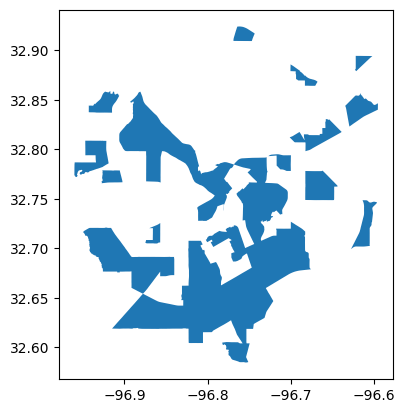

In [13]:
#Loading in food desert polygons to clip by
foodDesertsPolygon = gpd.read_file('FARA_Dallas_Food_Desert_Multipolygon.shp')
foodDesertsPolygon.plot()


In [14]:
AprilGeoDataFrameList = [H13AprilGeoDataFrame, H14AprilGeoDataFrame, G11AprilGeoDataFrame, G12AprilGeoDataFrame,
                        G13AprilGeoDataFrame, G14AprilGeoDataFrame, F11AprilGeoDataFrame, F12AprilGeoDataFrame,
                        F13AprilGeoDataFrame, F14AprilGeoDataFrame, E11AprilGeoDataFrame, E12AprilGeoDataFrame,
                        E13AprilGeoDataFrame]

In [16]:
FoodDesertAprilGeoDataFrameList = []

#Getting home data clipped by food desert polygons (we only want users who live in food deserts)
for item in AprilGeoDataFrameList:
    print(len(item['Device_ID']))
    clippedAprilLocations = gpd.clip(item, foodDesertsPolygon)
    FoodDesertAprilGeoDataFrameList.append(clippedAprilLocations)


4952
4903
2806
3451
3413
4626
2071
2712
1221
2824
2709
2196
745


In [101]:
#FoodDesertAprilGeoDataFrameList[5].to_file('G14_Food_Deserts.shp')

/tmp/ipykernel_644215/4233121464.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  FoodDesertAprilGeoDataFrameList[5].to_file('G14_Food_Deserts.shp')


In [17]:
final_Device_ID_List = []

for item in FoodDesertAprilGeoDataFrameList:
    print(len(list(item['Device_ID'])))
    final_Device_ID_List = final_Device_ID_List + list(item['Device_ID'])


198
97
294
403
441
726
226
677
573
395
128
553
241


In [21]:
#Making the final list of people living in food deserts we want mobility data for
final_Device_ID_List = list(pd.Series(final_Device_ID_List).unique())

In [28]:
#Number of people after 3month threshold
#Making list into dataframe
mydict = {'Device_ID': final_Device_ID_List}
df = pd.DataFrame.from_dict(mydict)


In [27]:
#Saving it as txt file (exporting it)
df.to_csv('finalListOfDeviceIDsAtThreeMonthThreshold.txt', sep='\t', index=False)

,Device_ID
0,8cf2d305f7f2612375fbcbea82b94447db322018
1,9f8d0529bce65c11249a4789ea43aaf8b26f3926
2,7a90e07cb117246405033dbb4004c9c176a4829b
3,a33cf4f99006a54d96100c7c519a0fb1703279c7
4,47ff52a16da2fa349e9c6da9c8dc83287a415fcc
...,...
4514,feba16676cd382a43f4557ac4dad78fc32e6b06d
4515,f4967c92eea12233bf9f4fcc4b6097db7ef17206
4516,5391bed9d223b18a1ef316e2d0f9b0526b6ddf53
4517,cdf47f488ea0ac2221dea0e9539a18e3c121ccbb
